In [1]:
import nltk
#Data Preprocessing Package
import re
import numpy as np
import pandas as pd
import os
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag


from nltk.tokenize import WordPunctTokenizer 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

In [2]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

In [3]:
lemma = WordNetLemmatizer()

In [ ]:

# index_df=pd.read_excel('after_cleansing.xlsx')
# index_df=index_df[:50]
# indices=index_df['종목명']
# len(index_df)

In [5]:

df_sdgs=pd.read_excel('./Data/text_sdgs.xlsx',sheet_name='Sheet5')
df_sdgs.head()


,filelist,rawdata,cleaned,sdgs,Unnamed: 4,Unnamed: 5
0,1.samsung_electronic2021.txt,Samsung Electronics Sustainability Report 2021...,samsung journey future approach environment su...,We are committed to minimizing health and envi...,NaN,83
1,2.sk_hynix2021.txt,We Do Technology\nSK hynix Sustainability Repo...,technology sustainability governance challenge...,Accumulated investment of KRW 3 trillion in te...,NaN,NaN
2,3.NAVER_2020.txt,Embracing\nSustainability for\nGrowth\nNAVER E...,sustainability growth april naver future busin...,"By 2030, substantially increase the number of ...",NaN,NaN
3,4.Samsung_Biologics_2021.txt,Sustainability\nReport\n2021\n_x000C_About Thi...,sustainability sustainability share sustainabi...,Ensure healthy lives and promote well-being fo...,NaN,NaN
4,6.KAKAO_2020.txt,2020\nKakao's\nCommitment and\nResponsibility\...,kakaos commitment responsibility introduction ...,"(4.4) By 2030, substantially increase the numb...",NaN,NaN


In [6]:
df_sdgs.set_index('filelist',inplace=True)
df_sdgs=df_sdgs[['sdgs']].dropna()
#df_sdgs=df_sdgs.dropna(how='any',axis=0)


In [11]:
df_sdgs.head(10)

,sdgs
filelist,
1.samsung_electronic2021.txt,We are committed to minimizing health and envi...
2.sk_hynix2021.txt,Accumulated investment of KRW 3 trillion in te...
3.NAVER_2020.txt,"By 2030, substantially increase the number of ..."
4.Samsung_Biologics_2021.txt,Ensure healthy lives and promote well-being fo...
6.KAKAO_2020.txt,"(4.4) By 2030, substantially increase the numb..."
7.Samsung_SDI2020.txt,"- Operate learning courses, industry-academia ..."
11.kia_2021.txt,Governance Economy Society_Employees Environme...
13.posco_2020.txt,Respond to climate change Improve atmospheric ...
14.HDMobis_2021.txt,Contribution to economic development through c...


82

In [ ]:
# directory = '/Users/kangjiwon/Downloads/important_code/TXT_convert/' #제 폴더니까 다시 바꾸세요~
# filelist = os.listdir(directory)
# df=pd.DataFrame(columns=['filelist','rawdata'])
# df['filelist']=filelist


In [ ]:
# for i in range(len(df)):
#     j = df['filelist'][i]
#     filename = directory + j
#     f=open(filename, 'r', encoding='unicode_escape')
#     txt = f.read()
#     f.close()
#     df['rawdata'][i] = txt

# df

In [ ]:
#pattern=re.compile(r'([\t\r()-.,:;!?`‘\'"�‧|%“])+')

In [10]:
#수정버전!!!

stop_words=nltk.corpus.stopwords.words('english')
stop_words=list(set(stop_words).union(set(sklearn_stop_words)))
remove_bracket=['step','report','reporting','ysis','ment','xaxis','flowe',
                'chainecure','marchapril','comm','bution','nance',
                'ophy','iance','nology','tainability','tain','sus','ernance','axis','gov']
general_term=['management','business','company','materiality',
             'analysis','thank','ceo','ceos','assessment','overview','topic','year']
stop_words.extend(remove_bracket)
stop_words.extend(general_term)


In [12]:

tokenizer = RegexpTokenizer("[\w]+")
#tokenizer=TreebankWordTokenizer()
lemma = WordNetLemmatizer()

len(stop_words)
def prepro(text):

    a=str(text).lower()
    a=re.sub('\n',' ',a)
    a=re.sub('\r',' ',a)
    a=re.sub('\t',' ',a)
    a=re.sub('x0002','',a)
    a = re.sub('[^a-zA-Z ]','',a).strip()

    tagged_list = pos_tag(tokenizer.tokenize(a))
    ad_and_nouns = [t[0] for t in tagged_list if t[1] in ['NN', 'NNS', 'NNP', 'NNPS','JJ', 'JJR', 'JJS']]
    e_list= [lemma.lemmatize(i, pos="n") for i in ad_and_nouns]
    
    #e_list= [lemma.lemmatize(i) for i in ad_and_nouns]
    sub_char= [re.sub('[^a-zA-Z]','',i).strip() for i in e_list]
    sub_char= [re.sub('gover','governance',i) for i in sub_char]
    sub_char= [re.sub('coml','compliance',i) for i in sub_char]
    sub_char= [re.sub('philos','philosophy',i) for i in sub_char]
    sub_char= [re.sub('governancenance','governance',i) for i in sub_char]
    sub_char= [re.sub('sus ','sustainability',i) for i in sub_char]
    sub_char= [re.sub('gov','governance',i) for i in sub_char]
    sub_char= [re.sub('ernance','',i) for i in sub_char]
    result=[w for w in sub_char if (w not in stop_words) and  (len(w) > 2)]
    # remove single character

    return result

In [ ]:
'''
stop_words=nltk.corpus.stopwords.words('english')
stop_words=list(set(stop_words).union(set(sklearn_stop_words)))
tokenizer=TreebankWordTokenizer()
lemma = WordNetLemmatizer()

remove_bracket=['[',']','step']
stop_words.extend(remove_bracket)
len(stop_words)

def prepro(text):
    a=text.lower()
    b=re.sub(pattern,'',a)
    b=re.sub(r'\[\[(?:[^\]|]*\|)?([^\]|]*)\]\]', '', b)
    c=re.sub('\n',' ',b)
    tagged_list = pos_tag(tokenizer.tokenize(c))
    ad_and_nouns = [t[0] for t in tagged_list if (t[1] == "NN")or(t[1]=="NNP") or(t[1]=='JJ')]
    e_list= [lemma.lemmatize(i) for i in ad_and_nouns]
    result=[w for w in e_list if w not in stop_words]
#     for w in e_list: 
#         if w not in stop_words: 
#             result.append(w)
    return result
    
'''


'\nstop_words=nltk.corpus.stopwords.words(\'english\')\nstop_words=list(set(stop_words).union(set(sklearn_stop_words)))\ntokenizer=TreebankWordTokenizer()\nlemma = WordNetLemmatizer()\n\nremove_bracket=[\'[\',\']\',\'step\']\nstop_words.extend(remove_bracket)\nlen(stop_words)\n\ndef prepro(text):\n    a=text.lower()\n    b=re.sub(pattern,\'\',a)\n    b=re.sub(r\'\\[\\[(?:[^\\]|]*\\|)?([^\\]|]*)\\]\\]\', \'\', b)\n    c=re.sub(\'\n\',\' \',b)\n    tagged_list = pos_tag(tokenizer.tokenize(c))\n    ad_and_nouns = [t[0] for t in tagged_list if (t[1] == "NN")or(t[1]=="NNP") or(t[1]==\'JJ\')]\n    e_list= [lemma.lemmatize(i) for i in ad_and_nouns]\n    result=[w for w in e_list if w not in stop_words]\n#     for w in e_list: \n#         if w not in stop_words: \n#             result.append(w)\n    return result\n    \n'

In [13]:
raw=list(sdgs)
len(raw)

82

In [14]:

sdg_terms=[' '. join(prepro(i)) for i in raw]


# cleaned=[]
# for rawdt in raw:
#     raw_list=[' '. join(prepro(i)) for i in rawdt]
#     raw_str = ' '.join(raw_list)  #instead of .split()
#     cleaned.append(raw_str)       #for writing in forms of string

In [15]:
len(sdg_terms)

82

In [16]:
sdg_terms[5]

'operate learning course training course license acquisition support program employee job expertise operate samsung environment campus educational program adolescent clean water sanitation discharge pollutant accordance standard stringent legallyallowable threshold remote water quality monitoring treatment facility relation organicinorganic effluent battery production location affordable clean energy contribute stability global renewable energy industry production supply battery power application use renewable energy entire worksites hungary plant undertake global companywide energy conservation task decent work economic growth contribute expansion green industry supply smallsized liion battery automotive battery electronic material support partner capacity building winwin cooperation advisory contribute smes partner competitiveness benefit sharing assistance outstanding talent industry innovation infrastructure goal ghg emission bau level contribute outstanding talent industry coopera

In [17]:
df_sdgs['ad_nouns'] =sdg_terms

df_sdgs.head(10)

,sdgs,ad_nouns
filelist,,
1.samsung_electronic2021.txt,We are committed to minimizing health and envi...,health environmental impact use chemical conce...
2.sk_hynix2021.txt,Accumulated investment of KRW 3 trillion in te...,investment krw technical cooperation increase ...
3.NAVER_2020.txt,"By 2030, substantially increase the number of ...",number youth adult relevant skill technical vo...
4.Samsung_Biologics_2021.txt,Ensure healthy lives and promote well-being fo...,healthy life age goal inclusive equitable qual...
6.KAKAO_2020.txt,"(4.4) By 2030, substantially increase the numb...",number youth adult relevant skill technical vo...
7.Samsung_SDI2020.txt,"- Operate learning courses, industry-academia ...",operate learning course training course licens...
11.kia_2021.txt,Governance Economy Society_Employees Environme...,economy environment societysuppliers societycu...
13.posco_2020.txt,Respond to climate change Improve atmospheric ...,respond change atmospheric environment promote...
14.HDMobis_2021.txt,Contribution to economic development through c...,contribution economic development corporate gr...


In [18]:
def flatten(l):
    flatlist=[]
    for elem in l:
        if type(elem) ==list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [19]:
df_sdgs.head()

,sdgs,ad_nouns
filelist,,
1.samsung_electronic2021.txt,We are committed to minimizing health and envi...,health environmental impact use chemical conce...
2.sk_hynix2021.txt,Accumulated investment of KRW 3 trillion in te...,investment krw technical cooperation increase ...
3.NAVER_2020.txt,"By 2030, substantially increase the number of ...",number youth adult relevant skill technical vo...
4.Samsung_Biologics_2021.txt,Ensure healthy lives and promote well-being fo...,healthy life age goal inclusive equitable qual...
6.KAKAO_2020.txt,"(4.4) By 2030, substantially increase the numb...",number youth adult relevant skill technical vo...


In [32]:
df_sdgs.to_excel('sdgs전처리.xlsx')

In [20]:
temp=[i.split() for i in df_sdgs.ad_nouns.to_list()]

flatten_sdg=flatten(temp)

In [21]:
len(flatten_sdg)

19829

In [22]:
flatten_sdg=pd.Series([x for x in flatten_sdg if len(x)>2])
print(flatten_sdg.value_counts().head(10), end=" ")

sustainable    299
energy         246
goal           222
development    205
social         202
education      176
activity       157
support        156
safety         151
growth         146
dtype: int64 

In [23]:
## Bi-Gram 빈도 분석

from nltk.util import ngrams
full_gram=[]
tmp=[i.split() for i in df_sdgs.ad_nouns.to_list()]
for k in tmp:
    two_grams = list(ngrams(k,2))
    #print(two_grams)
    two_gram_list=[" ".join(x) for x in two_grams]
    full_gram.append(two_gram_list)

In [24]:
len(full_gram)

82

In [25]:
full_bigram=flatten(full_gram)

In [26]:
len(full_bigram)

19747

In [27]:
flatten_bigram=pd.Series([x for x in full_bigram if len(x)>2])
print(flatten_bigram.value_counts().head(30), end=" ")

local community                  67
sustainable development          62
social contribution              60
climate change                   55
ghg emission                     54
human right                      51
renewable energy                 49
economic growth                  47
quality education                45
safety health                    44
decent work                      40
inclusive sustainable            35
energy efficiency                32
contribution activity            32
gender equality                  29
employment decent                28
productive employment            27
consumption production           27
social value                     24
sustainable economic             24
healthy life                     24
development goal                 24
change impact                    23
inclusive equitable              22
education lifelong               22
equitable quality                22
learning opportunity             21
sustainable industrializatio

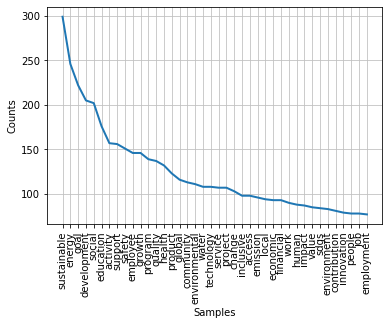

In [28]:
from nltk import Text
import matplotlib.pyplot as plt
%matplotlib inline

#single word
text = Text(flatten_sdg)
text.plot(40)
plt.show()

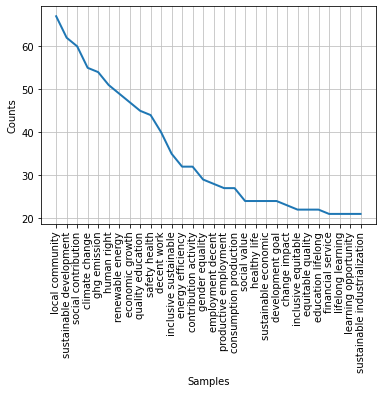

In [29]:
# from nltk import Text
# import matplotlib.pyplot as plt
# %matplotlib inline

# 바이그림
text = Text(flatten_bigram)
text.plot(30)

plt.show()


In [30]:
a=pd.DataFrame(flatten_bigram.value_counts().head(50))

In [33]:
a

,0
local community,67
sustainable development,62
social contribution,60
climate change,55
ghg emission,54
human right,51
renewable energy,49
economic growth,47
quality education,45
safety health,44


In [34]:
a.to_excel('sdgs_top50.xlsx')

In [35]:
from wordcloud import WordCloud # Joohye, you need to install wordcloud
from collections import Counter # in conda CLI by doing "conda install -c conda-forge wordcloud"

In [41]:
font_path="./install/NanumGothic.ttf" #pre-downloaded in the folder
wordcloud=WordCloud(font_path, width=800, height=800, background_color="white")

In [42]:
flatten_bigram

0        health environmental
1        environmental impact
2                  impact use
3                use chemical
4            chemical concern
                 ...         
19742         local community
19743    community engagement
19744       engagement impact
19745      impact development
19746     development program
Length: 19747, dtype: object

In [43]:
flatten_bigram.value_counts().head(30)

local community                  67
sustainable development          62
social contribution              60
climate change                   55
ghg emission                     54
human right                      51
renewable energy                 49
economic growth                  47
quality education                45
safety health                    44
decent work                      40
inclusive sustainable            35
energy efficiency                32
contribution activity            32
gender equality                  29
employment decent                28
productive employment            27
consumption production           27
social value                     24
sustainable economic             24
healthy life                     24
development goal                 24
change impact                    23
inclusive equitable              22
education lifelong               22
equitable quality                22
learning opportunity             21
sustainable industrializatio

In [44]:
count = Counter(flatten_bigram)
wordcloud=wordcloud.generate_from_frequencies(count)

In [45]:
array=wordcloud.to_array()

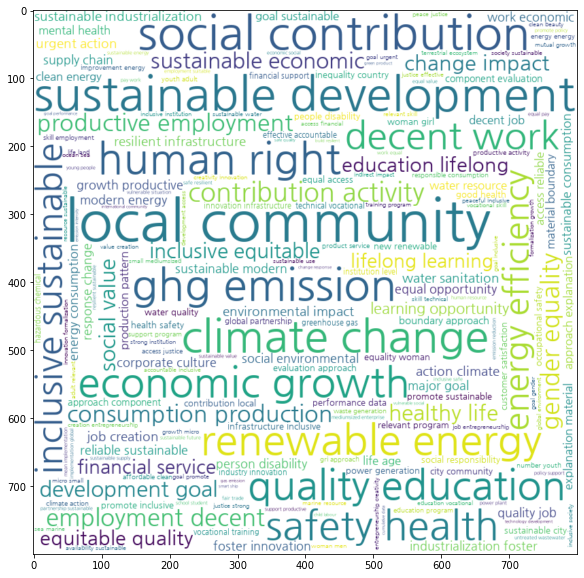

<Figure size 432x288 with 0 Axes>

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
plt.imshow(array, interpolation='bilinear')
plt.show()
plt.savefig('word_1.png')